In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Inspect for columns
inspector = inspect(engine)

measurement_columns = inspector.get_columns('measurement')
print("Measurement")
for c in measurement_columns:
    print(c['name'], c["type"])
    
station_columns = inspector.get_columns('station')
print("\nStations")
for c in station_columns:
    print(c['name'], c["type"])

Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Stations
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Query for the last date
last_date = session.query(Measurement.date).\
            order_by(Measurement.date.desc()).first()
print("Last Date: ", last_date)

Last Date:  ('2017-08-23',)


In [12]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("One year before last date: ", query_date)

One year before last date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= query_date).all()
for record in data:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.09)
('2017-04-04', 0.0)
('2017-04-05', 0.07)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.16)
('2017-04-12', 0.29)
('2017-04-13', 0.0)
('2017-04-14', 0.29)
('2017-04-17', None)
('2017-04-18', 0.12)
('2017-04-19', 0.0)
('2017-04-20', 0.0)
('2017-04-21', 1.05)
('2017-04-22', 0.7)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.14)
('2017-04-27', 0.02)
('2017-04-28', 0.09)
('2017-04-29', 0.95)
('2017-04-30', 1.17)
('2017-05-01', 0.03)
('2017-05-02', 0.01)
('2017-05-03', 0.01)
('2017-05-04', 0.08)
('2017-05-05', 0.28)
('2017-05-06', 0.06)
('2017-05-08', 0.95)
('2017-05-09', 0.52)
('2017-05-10', 0.0)
('2017-05-12', None)
('2017-05-15', None)
('2017-05-16', 0.05)
('2017-05-17', 0.0)
('2017-05-18', 0.16)
('2017-05-19', 0.01)
('2017-05-20', 0.01)
('2017-05-22', None)
('2017-05-23', 0.11)
('2017-05-24', 0.1)
('2017-05-25', 0.07)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-0

('2017-03-23', 0.02)
('2017-03-24', 0.07)
('2017-03-25', 0.43)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.08)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.36)
('2017-04-15', 0.0)
('2017-04-16', 0.0)
('2017-04-17', 0.3)
('2017-04-18', 0.15)
('2017-04-19', 0.0)
('2017-04-20', 0.35)
('2017-04-21', 2.36)
('2017-04-24', None)
('2017-04-25', 0.0)
('2017-04-26', 0.01)
('2017-04-27', 0.0)
('2017-04-28', 0.0)
('2017-04-29', 6.25)
('2017-04-30', 1.31)
('2017-05-01', 0.07)
('2017-05-02', 0.0)
('2017-05-03', 0.0)
('2017-05-04', 0.0)
('2017-05-05', 0.0)
('2017-05-06', 0.0)
('2017-05-07', 0.0)
('2017-05-08', 0.0)
('2017-05-09', 0.68)
('2017-05-10', 0.06)
('2017-05-11', 0.0)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('20

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data, columns = ["date", "prcp"])
prcp_df.set_index("date", inplace=True)
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [15]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(["date"])
prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


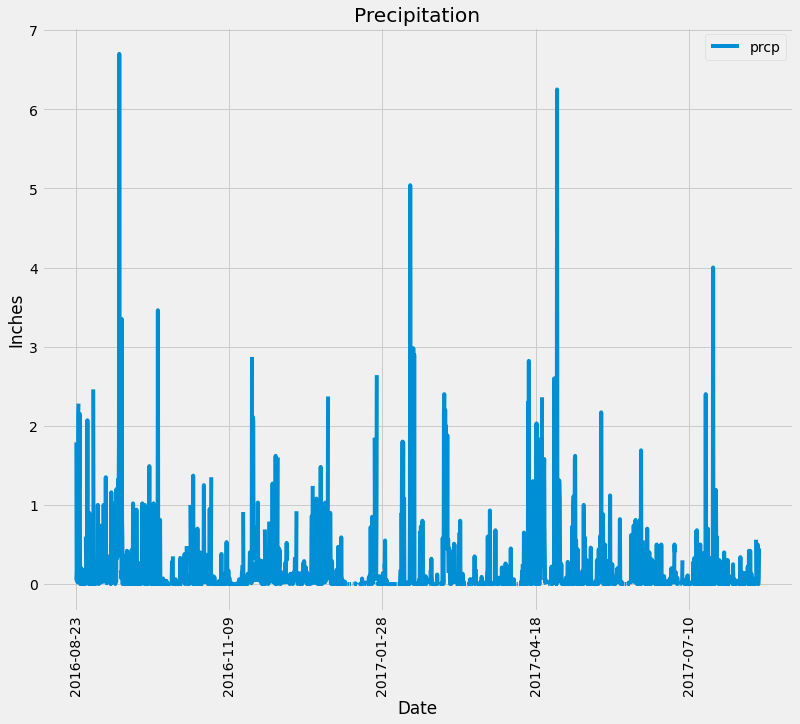

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90, figsize=(12,10))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation")
plt.tight_layout
plt.savefig("Output_Images/precipitation.png")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
mostactive_temps = session.query(*sel).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.id).desc()).first()
mostactive_temps

(54.0, 85.0, 71.66378066378067)

<Figure size 432x288 with 0 Axes>

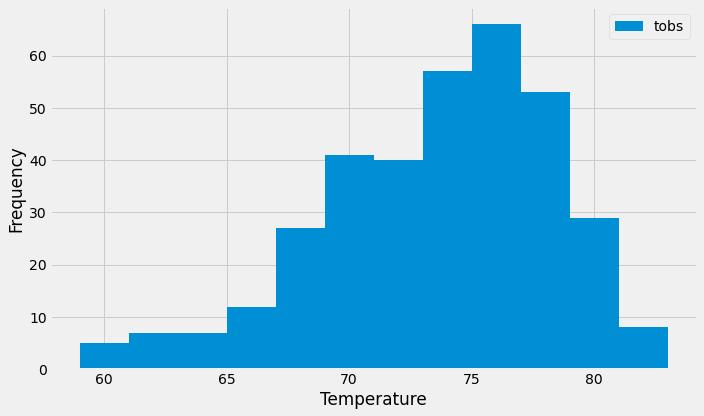

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps=session.query(Measurement.tobs).\
            filter(Measurement.station== "USC00519281").\
            filter(Measurement.date>=query_date).all()

temp_df = pd.DataFrame(temps, columns=["tobs"])

plt.tight_layout()
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(["tobs"])
plt.tight_layout()

plt.savefig("Output_Images/frequecy.png")
plt.show()

## Bonus Challenge Assignment

## Temperature Analysis II

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2017-01-01'
end_date = '2017-01-07'
temp_result = calc_temps(start_date, end_date)[0]
temp_result

(62.0, 68.36585365853658, 74.0)

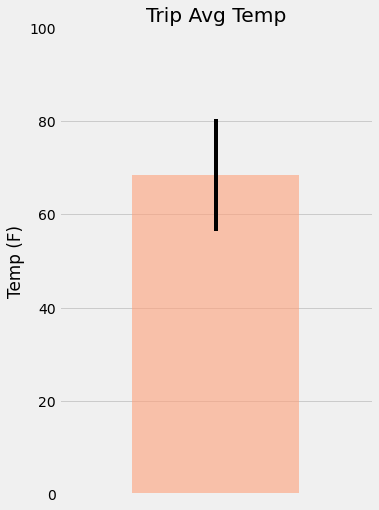

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x = [0]
y = [temp_result[1]]
error = [(temp_result[2] - temp_result[0])]

plt.figure(figsize= (5,8))
plt.bar(x, y, color='lightsalmon', yerr=error, alpha=.6)
plt.xlim(-0.75,0.75)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.ylim(0, 100)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid(which='major', axis='x', linestyle='')
plt.grid(which='major', axis='y', linestyle='-')
plt.savefig("Output_Images/trip_avg_temp.png")
plt.show()

## Daily Rainfall Average 

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [func.count(Measurement.prcp),Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation]
rainfall = session.query(*sel).\
            filter(Measurement.station==Station.station).\
            group_by(Measurement.station).\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            order_by(func.count(Measurement.prcp).desc()).all()
for r in rainfall:
    print(r)

(7, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(7, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(7, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(7, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(4, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)


In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
start_dt = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_dt = dt.datetime.strptime(end_date, '%Y-%m-%d')

trip_dates = []
normals =[]
while (start_dt <= end_dt):
    trip_dates.append(dt.datetime.strftime(start_dt,'%Y-%m-%d'))
    datestr = dt.datetime.strftime(start_dt,'%m-%d')
    normals.append(list(np.ravel(daily_normals(datestr))))
    start_dt = start_dt + dt.timedelta(days = 1)

normals

[[62.0, 69.15384615384616, 77.0],
 [60.0, 69.39622641509433, 77.0],
 [62.0, 68.9090909090909, 77.0],
 [58.0, 70.0, 76.0],
 [56.0, 67.96428571428571, 76.0],
 [61.0, 68.96491228070175, 76.0],
 [57.0, 68.54385964912281, 76.0]]

In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index("Date")
normals_df

,tmin,tavg,tmax
Date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0


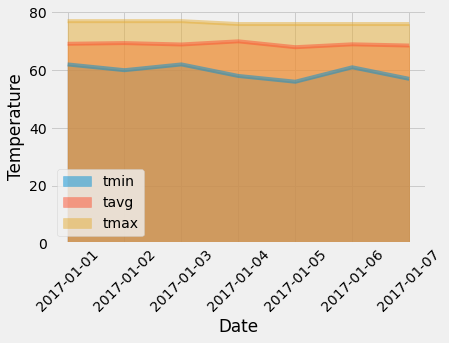

In [30]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.ylabel("Temperature")
plt.tight_layout
plt.savefig("Output_Images/daily_normals.png")
plt.show()

## Temperature Analysis 1

In [31]:
# Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

query_june="06"
june_avg = session.query(func.avg(Measurement.tobs)).\
            group_by(Measurement.station).\
            filter(func.strftime("%m", Measurement.date)== query_june).all()

query_dec="12"
dec_avg = session.query(func.avg(Measurement.tobs)).\
            group_by(Measurement.station).\
            filter(func.strftime("%m", Measurement.date)== query_dec ).all()


In [32]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
stats.ttest_ind(june_avg, dec_avg, equal_var=False)

Ttest_indResult(statistic=array([4.61586542]), pvalue=array([0.00036573]))

Our p-value is less than 0.05, this means that there are no statistically significant difference between out means.  